#### Resources

1. https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
2. Data : https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv



In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [3]:
df=pd.read_csv('data/banking.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [73]:
df.shape

(41188, 21)

In [75]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [76]:
## Write a function to display the type of columns
categorical_cols=[i for i in df.columns if df[i].dtype=='object']
print(categorical_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [77]:
#Check value counts by percentage categorical variables
cat_value_counts=[df[i].value_counts()/df.shape[0] for i in categorical_cols] 
print(cat_value_counts)

[admin.           0.253035
blue-collar      0.224677
technician       0.163713
services         0.096363
management       0.070992
retired          0.041760
entrepreneur     0.035350
self-employed    0.034500
housemaid        0.025736
unemployed       0.024619
student          0.021244
unknown          0.008012
Name: job, dtype: float64, married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: marital, dtype: float64, basic                  0.303802
university.degree      0.295426
high.school            0.231014
professional.course    0.127294
unknown                0.042027
illiterate             0.000437
Name: education, dtype: float64, no         0.791201
unknown    0.208726
yes        0.000073
Name: default, dtype: float64, yes        0.523842
no         0.452122
unknown    0.024036
Name: housing, dtype: float64, no         0.824269
yes        0.151695
unknown    0.024036
Name: loan, dtype: float64, cellular     0.634748
telephone    0.365252
Name: 

In [74]:
#Encode education column 

df['education']=df.education.apply(lambda x :'basic' if x.startswith('basic.') else x)
df['education'].unique()

array(['basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

#### Inferences

1. Job type, education, housing is distributed evenly
2. Most of the people are married 
3. Most haven't defaulted
4. Most haven't taken a loan

In [78]:
#Check distribution of the rest of columns nominal, ordinal, numerical, boolean
numerical_columns=set(df.columns)-set(categorical_cols)

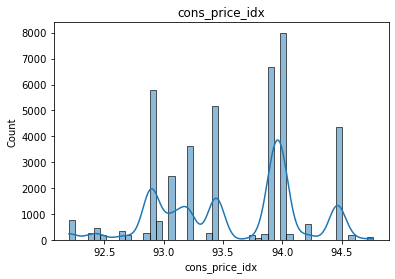

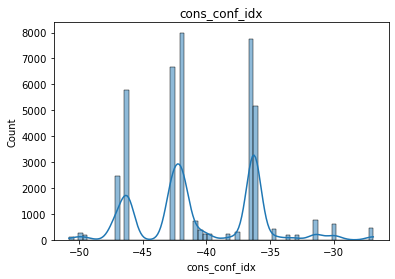

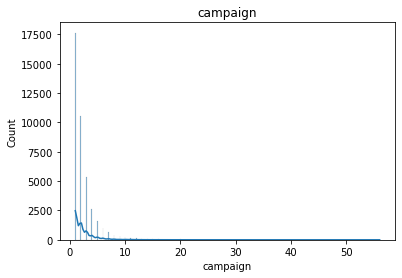

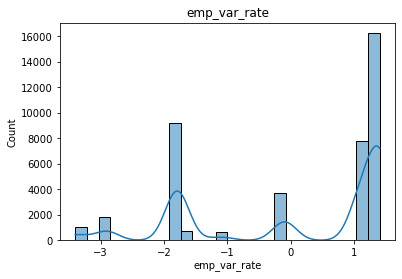

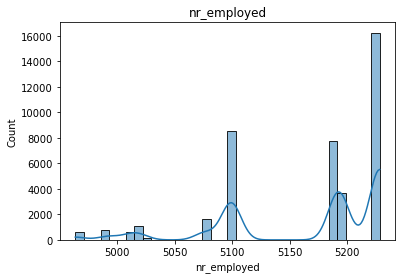

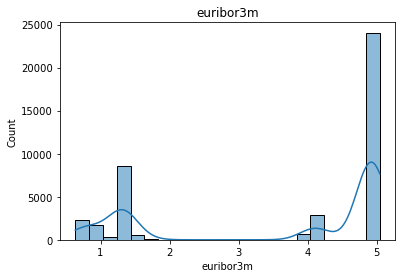

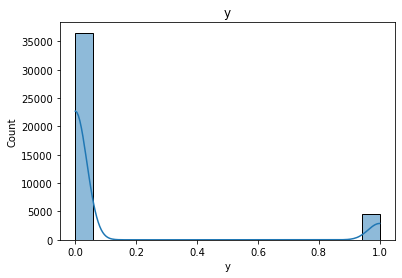

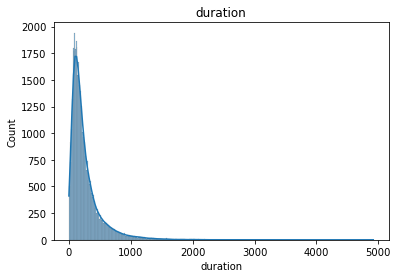

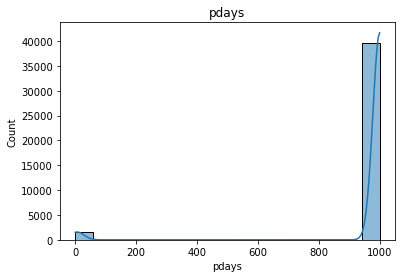

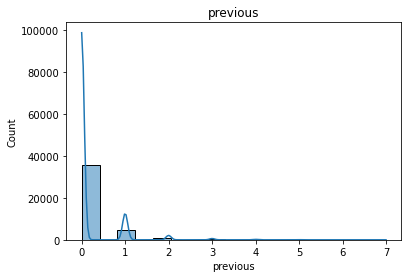

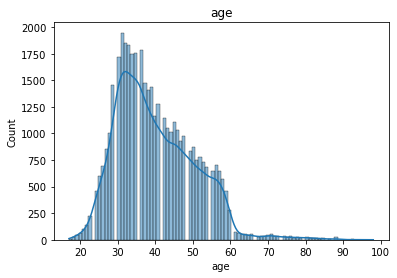

In [79]:
for i in numerical_columns:
      plt.figure()
      plt.title(i)  
      sns.histplot(df[i],kde=True)

#### Inferences
1. Most of them are between the ages 30-50
2. Most of them have not subscribed to a term deposit

#### Crosstabs to see the relationship with the predictor variable

In [14]:
job_category_subscr=pd.crosstab(df['job'],df['y'])
job_category_subscr['ratio']=a[1]/(a[0]+a[1])
job_category_subscr

y,0,1,ratio
job,,,
admin.,9070,1352,0.129726
blue-collar,8616,638,0.068943
entrepreneur,1332,124,0.085165
housemaid,954,106,0.100000
management,2596,328,0.112175
retired,1286,434,0.252326
self-employed,1272,149,0.104856
services,3646,323,0.081381
student,600,275,0.314286


<AxesSubplot:xlabel='job'>

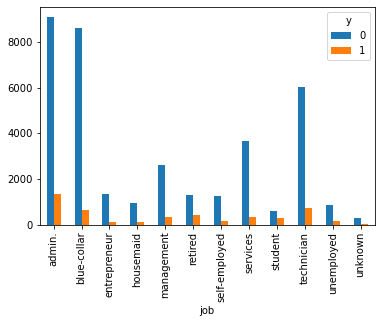

In [80]:
%matplotlib inline
pd.crosstab(df['job'],df['y']).plot(kind='bar')

<AxesSubplot:xlabel='marital'>

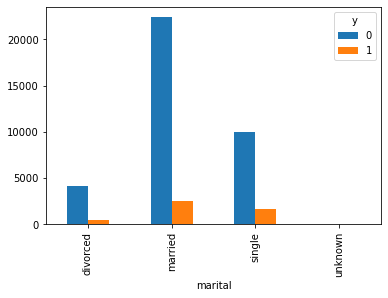

In [81]:
pd.crosstab(df['marital'],df['y']).plot(kind='bar')

<Figure size 432x288 with 0 Axes>

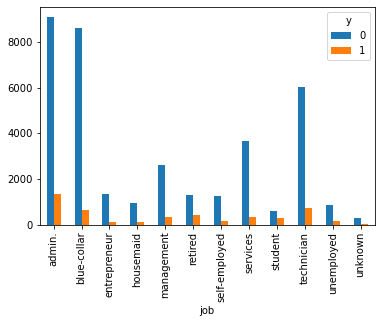

<Figure size 432x288 with 0 Axes>

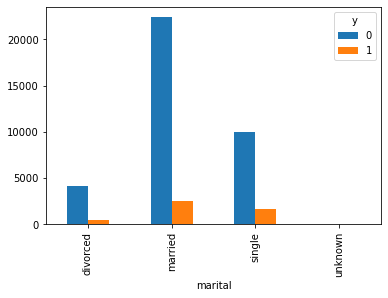

<Figure size 432x288 with 0 Axes>

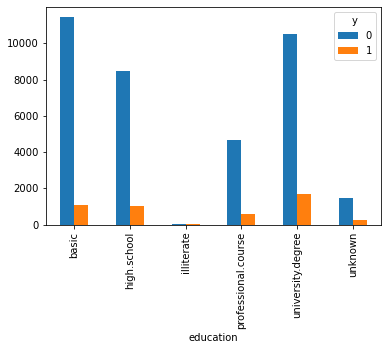

<Figure size 432x288 with 0 Axes>

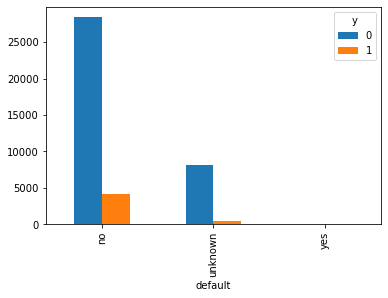

<Figure size 432x288 with 0 Axes>

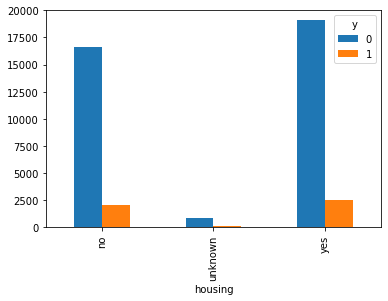

<Figure size 432x288 with 0 Axes>

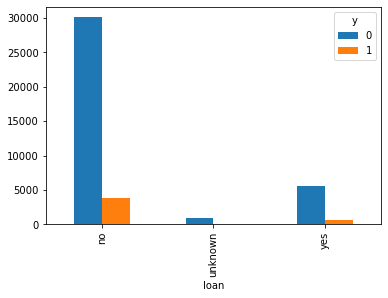

<Figure size 432x288 with 0 Axes>

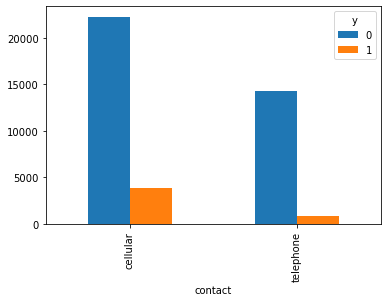

<Figure size 432x288 with 0 Axes>

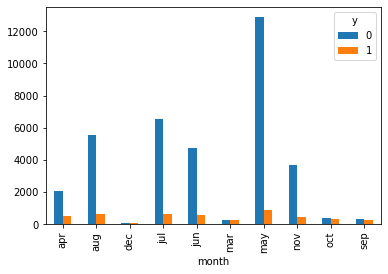

<Figure size 432x288 with 0 Axes>

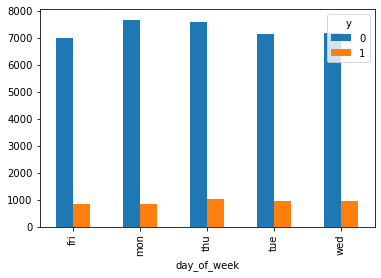

<Figure size 432x288 with 0 Axes>

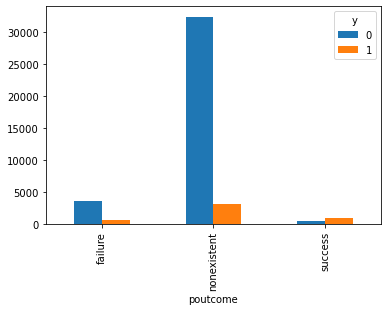

In [82]:
for i in categorical_cols:
    plt.figure()
    pd.crosstab(df[i],df['y']).plot(kind='bar')

#### Creating dummy variables for logistic regression

In [83]:
# Creating dummy variables for logistic regression
df_new = df.copy()
df_new = pd.get_dummies(df_new,
                     columns = ['marital','education','housing','default','job','loan','poutcome'])


display(df_new)

,age,contact,month,day_of_week,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,...,job_student,job_technician,job_unemployed,job_unknown,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,cellular,aug,thu,210,1,999,0,1.4,93.444,...,0,0,0,0,1,0,0,0,1,0
1,53,cellular,nov,fri,138,1,999,0,-0.1,93.200,...,0,1,0,0,1,0,0,0,1,0
2,28,cellular,jun,thu,339,3,6,2,-1.7,94.055,...,0,0,0,0,1,0,0,0,0,1
3,39,cellular,apr,fri,185,2,999,0,-1.8,93.075,...,0,0,0,0,1,0,0,0,1,0
4,55,cellular,aug,fri,137,1,3,1,-2.9,92.201,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,telephone,jun,thu,222,1,999,0,1.4,94.465,...,0,0,0,0,0,0,1,0,1,0
41184,31,telephone,may,thu,196,2,999,0,1.1,93.994,...,0,0,0,0,1,0,0,0,1,0
41185,42,telephone,may,wed,62,3,999,0,1.1,93.994,...,0,0,0,0,0,0,1,0,1,0
41186,48,telephone,oct,tue,200,2,999,0,-3.4,92.431,...,0,1,0,0,0,0,1,0,1,0


In [84]:
#
cols_to_keep=['age','duration','campaign',
       'pdays', 'previous', 'poutcome_failure','poutcome_success','poutcome_nonexistent', 'euribor3m', 'nr_employed', 'marital_divorced',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic','education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'housing_no', 'housing_unknown', 'housing_yes',
       'default_no', 'default_unknown', 'default_yes', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'loan_no', 'loan_unknown', 'loan_yes']

In [85]:
X=df_new[cols_to_keep]
y=df_new['y']

In [86]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

#### SMOTE
Need to balance the data for dependent variable

In [87]:

sm=SMOTE(random_state=0)
X_sm,y_sm=sm.fit_resample(X_train, y_train)

#### Recursive Feature Elimination




In [88]:
from sklearn.feature_selection import RFE
estimator=LogisticRegression(max_iter=5000)
selector=RFE(estimator,n_features_to_select=25,verbose=1)
rfe_guess=selector.fit(X_sm,y_sm)




Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.


In [89]:
print(rfe_guess.get_feature_names_out())
print(rfe_guess.get_support())
print(rfe_guess.ranking_)


#print(rfe_guess._get_params)


['marital_divorced' 'marital_married' 'marital_single' 'marital_unknown'
 'education_basic' 'education_high.school' 'education_professional.course'
 'education_university.degree' 'education_unknown' 'housing_no'
 'housing_unknown' 'housing_yes' 'default_no' 'default_unknown'
 'job_admin.' 'job_blue-collar' 'job_entrepreneur' 'job_housemaid'
 'job_management' 'job_self-employed' 'job_services' 'job_technician'
 'loan_no' 'loan_unknown' 'loan_yes']
[False False False False False False False False False False  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True False  True  True  True  True  True False  True  True False  True
 False False  True  True  True]
[15 13 12 17 11  8  9  7 10 14  1  1  1  1  1  1  6  1  1  1  1  1  1  1
  1 16  1  1  1  1  1  4  1  1  5  1  3  2  1  1  1]


In [90]:
rfe_Selection=['marital_divorced','marital_married','marital_single','marital_unknown',
 'education_basic','education_high.school','education_professional.course',
 'education_university.degree','education_unknown','housing_no',
 'housing_unknown','housing_yes','default_no','default_unknown',
 'job_blue-collar','job_entrepreneur','job_housemaid','job_management',
 'job_self-employed','job_services','job_unemployed','job_unknown',
 'loan_no','loan_unknown','loan_yes']



In [91]:
model=LogisticRegression(max_iter=5000)

In [92]:
#fitted_model.predict(X1)
fitted_model=model.fit(X_sm,y_sm)
#fitted_model.get_params()

In [93]:
preds=fitted_model.predict(x_test)
print('Accuracy is :',sum(y_test==preds)/len(y_test)*100)
#fitted_model.score(x_test,y_test)


Accuracy is : 90.8877559278142


#### Evaluating the model 

In [96]:
import statsmodels.api as sm

l_model=sm.Logit(y_sm,X_sm)
result=l_model.fit(maxiter=5000)
print(result.summary())

'''
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())
'''

Optimization terminated successfully.
         Current function value: 0.136867
         Iterations 303
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                51150
Model:                          Logit   Df Residuals:                    51110
Method:                           MLE   Df Model:                           39
Date:                Fri, 17 Mar 2023   Pseudo R-squ.:                  0.8025
Time:                        12:04:54   Log-Likelihood:                -7000.8
converged:                       True   LL-Null:                       -35454.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
age                               0.0106      0.003      3.969      

'\nlogit_model=sm.Logit(y,X)\nresult=logit_model.fit()\nprint(result.summary2())\n'

### Evaluating after doing rfe gives us the same result

In [97]:
rfe_X_sm=X_sm[rfe_Selection]
rfe_x_test=x_test[rfe_Selection]

fitted_model=model.fit(rfe_X_sm,y_sm)
preds=fitted_model.predict(rfe_x_test)
print('Accuracy is :',sum(y_test==preds)/len(y_test)*100)


Accuracy is : 88.7836853605244


#### Though model fit is not that good

In [98]:
l_model=sm.Logit(y_sm,rfe_X_sm)
result=l_model.fit(maxiter=5000)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.410215
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                51150
Model:                          Logit   Df Residuals:                    51126
Method:                           MLE   Df Model:                           23
Date:                Fri, 17 Mar 2023   Pseudo R-squ.:                  0.4082
Time:                        12:04:56   Log-Likelihood:                -20982.
converged:                       True   LL-Null:                       -35454.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
marital_divorced                 -1.4811      0.060    -24.672      0.